$1.$  Realice un notebook en el se programen y expliquen los siguientes algoritmos de integracion de ecuaciones diferenciales:

Verifique el funcionamiento de sus integradores encontrando la solucion de la siguiente ecuacion diferencial para
$y(t):$

$$\ddot{x} + 0.5 \dot{x} + sin(x) = e^{-t} sin(3t)$$

Con condiciones iniciales $\dot{x}(0)=1$ y $x(0)=0$

$a)$  Integracion con metodo de Euler

Se utiliza una expansión en series de Taylor para calcular una aproximación $y_{k+1}$:

$$y_{k+1}=y_k + hf(y_k,t_k)$$

Dicho metodo se puede considerar como el mas sencillo para resolver ecuaciones diferenciales de manera numerica.

In [3]:
from pylab import *
%matplotlib inline

In [4]:
def euler(ec_diff,y_i,t_f,h=0.01):
    tiempo = arange(0,t_f+h,h)
    y = zeros(len(tiempo))
    y[0] = y_i
    for i in range(len(tiempo)-1):
        y[i+1] = y[i] + h*ec_diff(y[i],tiempo[i])
    return tiempo,y

$b)$  Integracion sobre serie de Taylor a $2^o$ orden

In [5]:
def segundo_orden(ec_diff,y_i,x_i,t_f,ec_jac,h=0.1): 
    tiempo=arange(0,t_f+h,h)
    y = zeros(len(tiempo))
    y[0] = y_ini
    for i in range(len(tiempo)-1):
        y[i+1] = y[i] + h*ec_diff(y[i],tiempo[i])
        y[i+1] += 0.5*h*h*ec_jac(y[i],tiempo[i])[0]
        y[i+1] += 0.5*h*h*ec_jac(y[i],tiempo[i])[1]*ec_diff(y[i],tiempo[i])
    return tiempo,y

$c)$  Integracion con metodo de Runge-Kutta de $2^o$ orden

In [6]:
def rk2(ec,p_ini,x,h=0.1):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    for i in xrange (len(tiempos)-1):
        k = h*ec(sol[i,:],tiempos[i])
        f = ec(sol[i,:]+0.5*k,tiempos[i]+0.5*h)
        sol[i+1,:]=sol[i,:]+h*f
    return tiempos,sol

$d)$  Integracion con metodo de Runge-Kutta de $4^o$ orden


In [7]:
def rk4(ec,p_ini,x,h=0.1):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    for i in xrange (len(tiempos)-1):
        k1 = ec(sol[i,:],tiempos[i])
        k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
        k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
        k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
        sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempos,sol

Redefiniendo a $\dot{x}=y $, $\ddot{x}=\dot{y}= e^{-t} sin(3t)-sin x - 0.5 y$ , y $y[1]=y, y[0]=x$

In [8]:
def prueba(y,t): 
    return array([y[1],exp(-t)*sin(3*t)-0.5*y[1]-sin(y[0])])

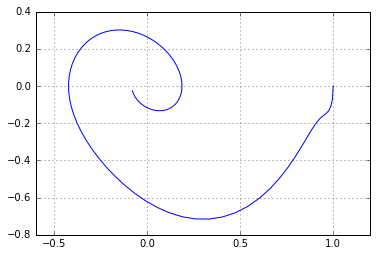

In [11]:
t,y=rk4(prueba,[1,0],[0.,10.])# [10 indica tiempo], [1.,0.] indica condicion inicial
plot(y[:,0],y[:,1])
axes().set_aspect('equal'),grid(True)
show()

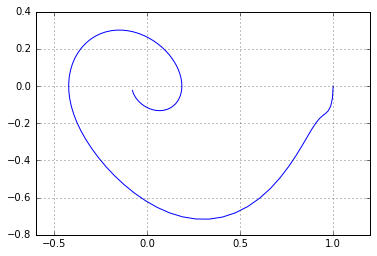

In [10]:
t,y=rk2(prueba,[1,0],[0,10])
plot(y[:,0],y[:,1])
axes().set_aspect('equal'),grid(True)
show()

$2.−$ Utilizando los integradores anteriores encuentre el mejor paso de integración para la siguiente ecuación:
$$y⃛ +ÿ^2−3y^3+cos2(y)=e^{−t}sin(3t)$$

Con condiciones iniciales $ÿ(1)=1, y(1)=2, y(1)=1 $. En particular que sucede en el intervalo $t∈[1,2]$ y $t∈[1,2.1]$.

$3.−$ Modifique las funciones integradoras en el problema 1 de tal manera que se puedan pasar argumentos opcionales al sistema de ecuaciones diferenciales de tal manera que se puedan modificar parámetros al momento de hacer la integración. Una vez hecho esto, obtenga la solución de la siguiente ecuación diferencial:
$$\ddot{x}+110 \dot{x}+4sin(x)=12sin(ωt)$$

Con condiciones iniciales $\dot{x}(0)=1$ y $x(0)=0$ y para $ω=\{1,1.1,1.2,1.3,...,2.9,3\}$. Realice la gráfica de algunas soluciones que representen el comportamiento de la solución en función de ω y explique su resultado.

In [12]:
omega=[1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3]
def rk2_ord(ec,y_i,t,args=omega,h=0.1):
    tiempos=arange(t[0],t[1]+h,h)
    sol=zeros((len(tiempos),len(y_i)))
    sol[0,:]=y_i
    if args==0:
        for i in xrange(len(tiempos)-1):
            k=h*ec(sol[i,:],tiempos[i])
            f=ec(sol[i,:]+0.5*k,tiempos[i]+0.5*h)
            sol[i+1,:]=sol[i,:]+h*f
    else:
        for i in xrange(len(tiempos)-1):
            k=h*ec(sol[i,:],tiempos[i],args)
            f=ec(sol[i,:]+0.5*k,tiempos[i]+0.5*h,args)
            sol[i+1,:]=sol[i,:]+h*f 
    return tiempos,sol

In [13]:
def ec_diff(y,t,omega): 
    return array([y[1],0.5*sin(1.1*t)-0.1*y[1]-4*sin(y[0])])

def ec_diff1(y,t,omega): 
    return array([y[1],0.5*sin(2.1*t)-0.1*y[1]-4*sin(y[0])])

def ec_diff2(y,t,omega): 
    return array([y[1],0.5*sin(1.5*t)-0.1*y[1]-4*sin(y[0])])

def ec_diff3(y,t,omega): 
    return array([y[1],0.5*sin(2.5*t)-0.1*y[1]-4*sin(y[0])])

def ec_diff4(y,t,omega):
    return array([y[1],0.5*sin(3*t)-0.1*y[1]-4*sin(y[0])])

Tal que para cada ecuacion $\dot{x}=y, \ddot{x}=\dot{y}=sin(ω t)-4sinx-0.1y$, donde $y[1]=y$ y $y[0]=x$.
Y entonces se tendria la gráfica de las soluciones que representan el comportamiento de la solución en función de ω, para $ω=\{1.1,2.1,1.5,2.5,3\}$

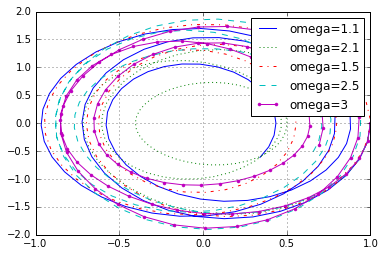

In [16]:
t,sol=rk2_ord(ec_diff,[1,0],[0,10])
t,sol1=rk2_ord(ec_diff1,[1,0],[0,10])
t,sol2=rk2_ord(ec_diff2,[1,0],[0,10])
t,sol3=rk2_ord(ec_diff3,[1,0],[0,10])
t,sol4=rk2_ord(ec_diff4,[1,0],[0,10])
plot(sol[:,0],sol[:,1],linestyle='-',label="omega=1.1")
plot(sol1[:,0],sol1[:,1],linestyle=':',label="omega=2.1")
plot(sol2[:,0],sol2[:,1],linestyle='-.',label="omega=1.5")
plot(sol3[:,0],sol3[:,1],linestyle='--',label="omega=2.5")
plot(sol4[:,0],sol4[:,1],marker='.',label="omega=3")
grid(True)
legend()
show()

$4.−$ Considere el siguiente sistema de ecuaciones diferenciales:
$$dx/dt=10(y−x)$$
$$dy/dt=x(28−z)−y$$
$$dz/dt=xy−83z$$
Realice una integración numérica del sistema de ecuaciones con alguno de los integradores del problema y realice los siguientes ejercicios: 
$a)$ Elija una condición inicial aleatoria en el intervalo $x,y,z∈[−5,5]$ y realice la gráfica de la solución en el plano $xy$, $xz$ y $yz$ y comente sus observaciones.

$(b)$ Ahora tome 3 soluciones precidas. Para ello proponga 3 condiciones iniciales tales que en la coordenada en y las condiciones iniciales difieran entre si en $10^{−2}$. Explique lo que observa.
